In [6]:
import os,glob
import pandas as pd
import nltk
nltk.download('punkt') #Necessary for the word_tokenize function
import numpy as np
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import random

[nltk_data] Downloading package punkt to /home/sago/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
original_files = {}
for i in glob.glob('data/raw/*txt'):
    doc = open(i).read().splitlines()
    original_files[i[-5]] = doc

### Dictionary of dataframes

In [8]:
original_files['I'][0].split("||")

['1.2 ',
 ' Ac on æ drihtnes his willa & on his æ he smeaþ ł foreþenceþ dæges & nihtes ',
 ' Sed in lege domini uoluntas eius et in lege eius meditabitur die ac nocte.']

In [9]:
dict_dataframes = {}
for k,manuscript in original_files.items():
    verse_list,old_english_list,latin_list   = [],[],[]
    for verse in manuscript:

        items = verse.split("||")
        if len(items)<3:
            continue
        verse_list.append(items[0])
        old_english_list.append(items[1])
        latin_list.append(items[2])
    
    df_manuscript = pd.DataFrame({"verse":verse_list,"old_english":old_english_list,"latin":latin_list})

    dict_dataframes[k] = df_manuscript



### Descriptive statistics

In [10]:
print("m","verses","tokens_an","tokens_lat","an_ratio","lat_ratio")
english_tokens_list = []
english_tokens_list_per_manuscript = {}

latin_tokens_list = []

for k,df in dict_dataframes.items():
    english_tokens=df["old_english"].apply(lambda x: nltk.word_tokenize(x))
    english_tokens_list.append(english_tokens)
    english_tokens_list_per_manuscript[k] = english_tokens
    english_tokens_size = english_tokens.apply(len).sum()

    latin_tokens=df["latin"].apply(lambda x: nltk.word_tokenize(x))
    latin_tokens_list.append(latin_tokens)
    latin_tokens_size = latin_tokens.apply(len).sum()

    english_token_verse_ratio = round(english_tokens_size/len(df),2)
    latin_token_verse_ratio = round(latin_tokens_size/len(df),2)
    print(k,len(df),english_tokens_size ,latin_tokens_size,
    english_token_verse_ratio,latin_token_verse_ratio)


m verses tokens_an tokens_lat an_ratio lat_ratio
I 2447 36876 31677 15.07 12.95
D 2455 29267 32814 11.92 13.37
G 2457 35283 32346 14.36 13.16
A 2411 32758 33037 13.59 13.7
E 2398 33635 31732 14.03 13.23
C 2452 33076 32421 13.49 13.22
J 2457 33240 31920 13.53 12.99
B 2356 31064 30950 13.19 13.14
F 2456 33150 31869 13.5 12.98
K 2388 29077 31162 12.18 13.05
N 42 431 410 10.26 9.76
H 1890 23868 25917 12.63 13.71
L 446 5808 5573 13.02 12.5


### Word cloud

In [11]:
english_tokens_str=' '.join(pd.concat(english_tokens_list).sum())
latin_tokens_str = ' '.join(pd.concat(latin_tokens_list).sum())


In [12]:
book_mask = np.array(Image.open('book.png'))
image_colors = ImageColorGenerator(book_mask)

In [13]:
wordcloud_english = WordCloud(width=800, height=400, background_color='white',mask=book_mask).generate_from_text(english_tokens_str)
wordcloud_latin = WordCloud(width=800, height=400, background_color='white',mask=book_mask).generate_from_text(latin_tokens_str)

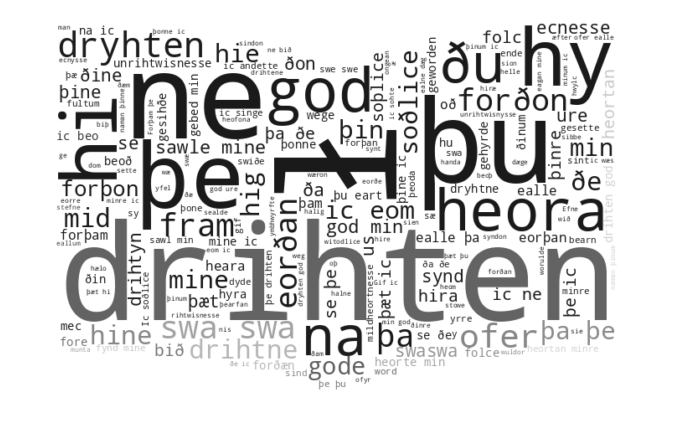

In [14]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_english.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

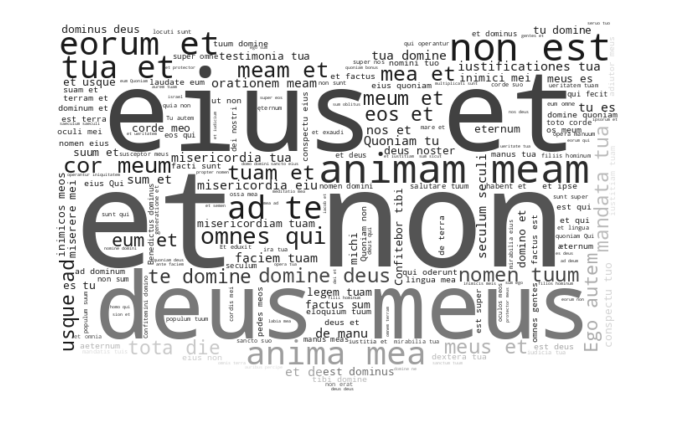

In [15]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_latin.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
## Finding unique tokens by manuscript
english_unique_tokens_per_manuscript = {}

for k,m in english_tokens_list_per_manuscript.items():

    temp_unique_tokens = set(m.sum())

    tokens_from_other_lists = []
    for key, value in english_tokens_list_per_manuscript.items():
        if key != k:
            tokens_from_other_lists.extend(set(value.sum()))
    
    english_unique_tokens_per_manuscript[k] = temp_unique_tokens.difference(set(tokens_from_other_lists))

In [20]:

manuscripts = []
sizes = []
tokens = []

for k,v in english_unique_tokens_per_manuscript.items():
    manuscripts.append(k)
    sizes.append(len(v))

    random.seed(10)
    random_values = random.sample(v, k=4)
    tokens.append(random_values)

df_unique_tokens = pd.DataFrame({"manuscript":manuscripts,"num_unique":sizes,"sample":tokens})

/tmp/ipykernel_12419/1642908977.py:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_values = random.sample(v, k=4)


In [21]:
df_unique_tokens.to_excel("sample_unique_tokens.xlsx")